In [ ]:
import pandas as pd
import numpy as np
from google.colab import files

In [ ]:
# import "Dataset prediction USDCNY.xlsx"
files.upload()

In [ ]:
# read the data
df = pd.read_excel('Dataset prediction USDCNY.xlsx')

In [ ]:
# show the dataset
df.head()

,Date,USD/CNY - US Dollar Chinese Yuan,DY (endogenous in first difference),Direction,S&P 500 Index,SSE Composite Index,GDP Growth Differential (US - China in %),USA Interest Rate,China Interest Rate
0,2015-01-01,6.2495,NaN,NaN,1994.99,3210.36,-3.5,0.11,5.3
1,2015-02-01,6.2695,0.003200,Up,2104.50,3310.30,-3.5,0.11,5.3
2,2015-03-01,6.1990,-0.011245,Down,2067.89,3747.90,-3.5,0.11,5.3
3,2015-04-01,6.2018,0.000452,Up,2085.51,4441.66,-4.6,0.12,5.3
4,2015-05-01,6.1980,-0.000613,Down,2107.39,4611.74,-4.6,0.12,5.3


In [ ]:
# permanently drop 'Date' as it is not a feature
df.drop('Date', axis=1, inplace=True)

In [ ]:
# show the dataset
df.head()

,USD/CNY - US Dollar Chinese Yuan,DY (endogenous in first difference),Direction,S&P 500 Index,SSE Composite Index,GDP Growth Differential (US - China in %),USA Interest Rate,China Interest Rate
0,6.2495,NaN,NaN,1994.99,3210.36,-3.5,0.11,5.3
1,6.2695,0.003200,Up,2104.50,3310.30,-3.5,0.11,5.3
2,6.1990,-0.011245,Down,2067.89,3747.90,-3.5,0.11,5.3
3,6.2018,0.000452,Up,2085.51,4441.66,-4.6,0.12,5.3
4,6.1980,-0.000613,Down,2107.39,4611.74,-4.6,0.12,5.3


In [ ]:
# "isnull" identifies missing values
# the first "sum()" calculates the total number of missing values per column
# the second "sum()" calculates the total number of missing values per row
df.isnull().sum().sum()

np.int64(1)

In [ ]:
# since there can be multiple modes,
# [0] selects the first mode in the list,
# [1] selects the second mode, and so forth.
df['Direction'].fillna(value=df['Direction'].mode()[0])

,Direction
0,Down
1,Up
2,Down
3,Up
4,Down
...,...
115,Down
116,Up
117,Up
118,Up


In [ ]:
mode_value = df['Direction'].mode()[0] if not df['Direction'].mode().empty else 'Up'

In [ ]:
df['Direction'] = df['Direction'].fillna(value=mode_value)

In [ ]:
# "fill" is used for imputation
# "na" is used to indicate missing values
# "DY (endogenous in first difference)" is the name of the variable
# "median" can be used instead of "mean"
df['DY (endogenous in first difference)'].fillna(value=df['DY (endogenous in first difference)'].mean())

,DY (endogenous in first difference)
0,0.001406
1,0.003200
2,-0.011245
3,0.000452
4,-0.000613
...,...
115,-0.017910
116,-0.010212
117,0.014278
118,0.017491


In [ ]:
# for quick descriptive statistics
df['GDP Growth Differential (US - China in %)'].describe()

,GDP Growth Differential (US - China in %)
count,120.000000
mean,-3.117500
std,7.395861
min,-31.300000
25%,-4.625000
50%,-3.550000
75%,-1.700000
max,30.300000


In [ ]:
df['SSE Composite Index'].describe()

,SSE Composite Index
count,120.00000
mean,3183.78075
std,325.51497
min,2493.90000
25%,2976.13000
50%,3164.03500
75%,3349.64500
max,4611.74000


In [ ]:
df['USD/CNY - US Dollar Chinese Yuan'].describe()

,USD/CNY - US Dollar Chinese Yuan
count,120.000000
mean,6.756899
std,0.318731
min,6.198000
25%,6.473000
50%,6.763750
75%,7.020900
max,7.315800


In [ ]:
df['S&P 500 Index'].describe()

,S&P 500 Index
count,120.000000
mean,3365.555250
std,1094.236322
min,1920.030000
25%,2458.577500
50%,3008.970000
75%,4184.327500
max,6032.380000


In [ ]:
df['DY (endogenous in first difference)'].describe()

,DY (endogenous in first difference)
count,119.000000
mean,0.001406
std,0.014264
min,-0.034152
25%,-0.008174
50%,0.000666
75%,0.009699
max,0.042386


In [ ]:
df['USA Interest Rate'].describe()

,USA Interest Rate
count,120.000000
mean,1.782583
std,1.873314
min,0.050000
25%,0.127500
50%,1.155000
75%,2.402500
max,5.330000


In [ ]:
df['China Interest Rate'].describe()

,China Interest Rate
count,120.000000
mean,4.039250
std,0.455224
min,3.100000
25%,3.700000
50%,4.150000
75%,4.300000
max,5.300000


In [ ]:
df['Direction'].describe()

,Direction
count,120
unique,2
top,Down
freq,62


In [ ]:
# data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   USD/CNY - US Dollar Chinese Yuan           120 non-null    float64
 1   DY (endogenous in first difference)        119 non-null    float64
 2   Direction                                  120 non-null    object 
 3   S&P 500 Index                              120 non-null    float64
 4   SSE Composite Index                        120 non-null    float64
 5   GDP Growth Differential (US - China in %)  120 non-null    float64
 6   USA Interest Rate                          120 non-null    float64
 7   China Interest Rate                        120 non-null    float64
dtypes: float64(7), object(1)
memory usage: 7.6+ KB


In [ ]:
# change the target type
df['Direction'] = df['Direction'].astype('category')

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Direction'] = encoder.fit_transform(df['Direction'])

In [ ]:
# updated data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   USD/CNY - US Dollar Chinese Yuan           120 non-null    float64
 1   DY (endogenous in first difference)        119 non-null    float64
 2   Direction                                  120 non-null    int64  
 3   S&P 500 Index                              120 non-null    float64
 4   SSE Composite Index                        120 non-null    float64
 5   GDP Growth Differential (US - China in %)  120 non-null    float64
 6   USA Interest Rate                          120 non-null    float64
 7   China Interest Rate                        120 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 7.6 KB


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# the "to_numpy()" method converts a DataFrame into a NumPy array
x = df.drop('Direction',axis=1).to_numpy()
y = df['Direction'].to_numpy()

In [ ]:
x = df.drop(columns=['Direction', 'USD/CNY - US Dollar Chinese Yuan', 'DY (endogenous in first difference)'])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [ ]:
# "Tensorflow" is a Deep Learning library used for building and training neural networks
import tensorflow as tf

# "Sequential" helps to build a model by stacking layers one after another
from tensorflow.keras.models import Sequential

# "Dense" creates layers where each neuron is connected to all neurons in the
# previous layer, and allows us to set the number of neurons and the activation
# function to be used
from tensorflow.keras.layers import Dense

# "Activation" provides various activation functions to use in the layers
from tensorflow.keras.layers import Activation

# "Adam" is an optimization algorithm used to adjust the
# weights and biases during training
from tensorflow.keras.optimizers import Adam

In [ ]:
# create an empty model
# "model.add" is used to add layers to the neural network
# "units" refers to the number of neurons in the layer
model = Sequential()

# input layer
# units = number of features (5)
model.add(Dense(units=5,activation='relu'))

# hidden layer
# units = average number of neurons between input and output layers: 3=(5+1)/2
model.add(Dense(units=3,activation='relu'))

# output layer
# output<0.5 = "class 0"
# output>=0.5 = "class 1"
model.add(Dense(units=1,activation='sigmoid'))

# compile the model
# "loss" specifies the function used to measure the model's error during training
# "binary_crossentropy" is used as the loss function for binary classification tasks
model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
# import necessary libraries
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# defining the criteria for stopping the training using the "EarlyStopping" method

# "monitor" specifies the value to be monitored by the method
# this value can be either validation loss ("val_loss") or validation accuracy ("val_accuracy")
# if "monitor" is set to "val_loss", the goal is to minimize this value ('min')
# if "monitor" is set to "val_accuracy", the goal is to maximize this value ('max')
# loss measures the model's prediction error
# while accuracy measures the proportion of correct predictions

# "verbose" controls the display of training progress:
# 0: silent mode (no output)
# 1: progress bar is displayed
# 2: progress information is displayed for each epoch

# "patience" is the number of epochs to wait for an improvement before stopping the training
# common values for patience range from 10 to 100 epochs

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [ ]:
# model training

# a callback refers to a function that is executed at specific stages of the training process
# the validation set serves a different purpose than the test set
# the validation set is used during training to tune and optimize the model
# the test set is used after training to evaluate the final model's performance on completely unseen data

model.fit(x=x_train, y=y_train, epochs=500, validation_data=(x_test, y_test), callbacks=[early_stop])

Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 717.4572 - val_loss: 696.0933
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 672.2094 - val_loss: 677.9115
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 680.2480 - val_loss: 660.5862
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 664.6578 - val_loss: 644.2717
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 612.6730 - val_loss: 628.6242
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 613.7910 - val_loss: 613.3807
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 604.7144 - val_loss: 598.6492
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 562.3361 - val_loss: 584.3224
Epoch 9/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 576.3175 - val_loss: 570.2387
Epoch 10/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 570.0277 - val_loss: 556.5261
Epoch 11/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - loss: 530.8535 - val_loss: 543.0881
Epoch 12/500
3/3 ━━━━━━━━

<Axes: >

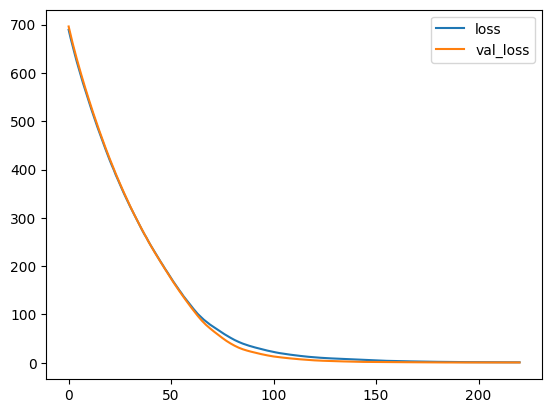

In [ ]:
# visualization

# "model.history.history" stores the training and validation loss values recorded at each epoch
# "pd.DataFrame" converts this data into a DataFrame for easier plotting
model_loss = pd.DataFrame(model.history.history)

# plot the loss values for each epoch
model_loss.plot()

In [ ]:
# output<0.5 = "class 0"
# output>=0.5 = "class 1"
# use ".astype(int)" to convert the predictions to integer values (0 and 1)
y_pred = (model.predict(x_test)>= 0.5).astype(int)
y_pred

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0]])

In [ ]:
# import necessary libraries
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# print performance metrics
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[[19  0]
 [14  3]]


              precision    recall  f1-score   support

           0       0.58      1.00      0.73        19
           1       1.00      0.18      0.30        17

    accuracy                           0.61        36
   macro avg       0.79      0.59      0.52        36
weighted avg       0.78      0.61      0.53        36

